In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pwd

'C:\\Users\\gadda'

In [4]:
cd C:\Users\gadda\Downloads\superbowl-history-1967-2020

C:\Users\gadda\Downloads\superbowl-history-1967-2020


In [5]:
pwd

'C:\\Users\\gadda\\Downloads\\superbowl-history-1967-2020'

In [20]:
df = pd .read_csv('AMD.csv',header=0,index_col='Date',parse_dates=True)

In [21]:
df.head(n=3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-31,15.20,15.20,14.81,14.90,14.90,7395900
2004-01-02,15.10,15.11,14.77,14.86,14.86,8220700
2004-01-05,15.05,15.27,15.01,15.20,15.20,9156000


In [22]:
df.tail(n=3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-11,30.379999,30.43,29.510000,29.760000,29.760000,50631700
2019-09-12,30.080000,30.84,29.950001,30.209999,30.209999,53618300
2019-09-13,30.270000,30.85,29.950001,30.690001,30.690001,47758800


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3953 entries, 2003-12-31 to 2019-09-13
Data columns (total 6 columns):
Open         3953 non-null float64
High         3953 non-null float64
Low          3953 non-null float64
Close        3953 non-null float64
Adj Close    3953 non-null float64
Volume       3953 non-null int64
dtypes: float64(5), int64(1)
memory usage: 216.2 KB


In [24]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3953.000000,3953.000000,3953.000000,3953.000000,3953.000000,3.953000e+03
mean,10.870450,11.083322,10.640293,10.858219,10.858219,3.033934e+07
std,8.508267,8.665403,8.335102,8.499793,8.499793,2.991771e+07
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,4.010000,4.060000,3.910000,4.000000,4.000000,1.277820e+07
50%,7.880000,8.040000,7.710000,7.910000,7.910000,2.054760e+07
75%,15.050000,15.300000,14.740000,14.990000,14.990000,3.581690e+07
max,41.980000,42.700001,40.619999,42.099998,42.099998,3.250584e+08


In [26]:
!pip install pandas_datareader 

  Using cached https://files.pythonhosted.org/packages/14/52/accb990baebe0063977f26e02df36aa7eb4015ed4e86f828cd76273cd6f1/pandas_datareader-0.8.1-py2.py3-none-any.whl


In [27]:
import pandas_datareader as pdr

In [28]:
import datetime

In [30]:
nvda = pdr.get_data_yahoo('NVDA',start=datetime.datetime(2004,1,1),end=datetime.datetime(2019,9,15))

In [32]:
qcom = pdr.get_data_yahoo('QCOM',start=datetime.datetime(2004,1,1),end=datetime.datetime(2019,9,15))

In [33]:
nvda.head(n=3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-31,7.950000,7.606667,7.913333,7.733333,12431700.0,7.117600
2004-01-02,7.963333,7.693333,7.856667,7.693333,10910400.0,7.080785
2004-01-05,7.996666,7.740000,7.810000,7.943333,14382300.0,7.310880


In [36]:
indc = pdr.get_data_yahoo('INTC',start=datetime.datetime(2004,1,1),end=datetime.datetime(2019,9,15))

In [39]:
ibm = pdr.get_data_yahoo('IBM',start = datetime.datetime(2004,1,1),end=datetime.datetime(2019,9,15))

In [40]:
ibm.tail(n=3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-11,145.119995,142.710007,144.850006,143.600006,3869700.0,140.457062
2019-09-12,144.039993,141.880005,144.029999,143.619995,2402000.0,140.476624
2019-09-13,144.649994,143.259995,144.320007,143.669998,2206600.0,140.525528


In [41]:
ibm.count()

High         3953
Low          3953
Open         3953
Close        3953
Volume       3953
Adj Close    3953
dtype: int64

In [44]:
nvda.shape

(3953, 6)

In [55]:
import matplotlib.dates as mdates

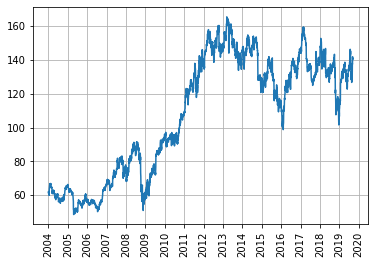

In [73]:
plt.plot(ibm.index,ibm['Adj Close'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

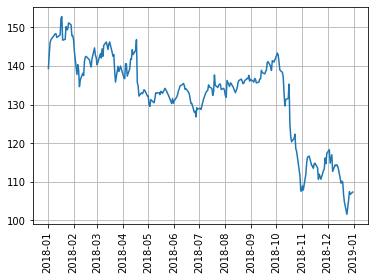

In [99]:
ibm_18 = ibm.loc[pd.Timestamp('2018-01-01'):pd.Timestamp('2018-12-31')]
plt.plot(ibm_18.index,ibm_18['Adj Close'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation= 90)
plt.grid(True)
plt.show()

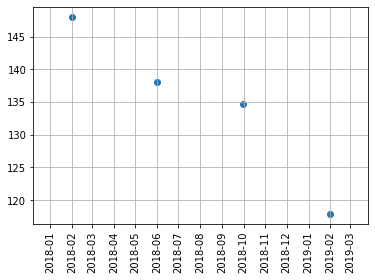

In [105]:
monthly_ibm_18 = ibm_18.resample('4M').mean()
plt.scatter(monthly_ibm_18.index,monthly_ibm_18['Adj Close'])
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.show()